## 附录1
5.编程：参照BS（1973）的图1，利用BS定价绘制三个不同
到期日的期权价格与现货价格的曲线，并计算和绘制三个
曲线的一阶导和二阶导的曲线

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体以支持中文显示
# 设置支持中文和数学符号的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'DejaVu Sans', 'SimHei']  # 优先使用支持数学符号的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Black-Scholes 看涨期权价格计算函数
def black_scholes_call(S, K, T, r, sigma):
    """计算看涨期权价格
    参数:
        S: 现货价格
        K: 行权价格
        T: 到期时间（年）
        r: 无风险利率
        sigma: 波动率
    返回:
        期权价格
    """
    if T == 0:
        return np.maximum(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 一阶导数：Delta
def delta_call(S, K, T, r, sigma):
    """计算期权价格对现货价格的一阶导数（Delta）
    参数同上
    返回:
        Delta 值
    """
    if T == 0:
        return (S > K).astype(float)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# 二阶导数：Gamma
def gamma_call(S, K, T, r, sigma):
    """计算期权价格对现货价格的二阶导数（Gamma）
    参数同上
    返回:
        Gamma 值
    """
    if T == 0:
        return 0
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))







In [8]:
# 参数设置（参考 Black-Scholes 1973 图1）
K = 20.0  # 行权价格
r = 0.08  # 无风险利率
sigma = 0.3  # 波动率
Ts = [0.25, 0.5, 0.75]  # 三个不同的到期时间（年）
S = np.linspace(5, 40, 200)  # 现货价格范围


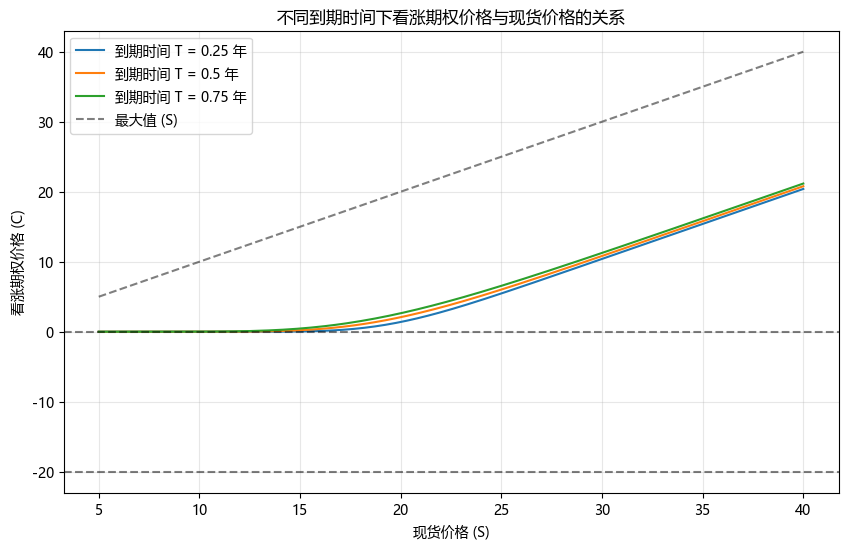

In [9]:
# 绘图1：期权价格与现货价格的关系
plt.figure(figsize=(10, 6))
for T in Ts:
    C = np.array([black_scholes_call(s, K, T, r, sigma) for s in S])
    plt.plot(S, C, label=f'到期时间 T = {T} 年')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=-K, color='k', linestyle='--', alpha=0.5)  # 最小值线
plt.plot(S, S, 'k--', alpha=0.5, label='最大值 (S)')  # 最大值线
plt.xlabel('现货价格 (S)')
plt.ylabel('看涨期权价格 (C)')
plt.title('不同到期时间下看涨期权价格与现货价格的关系')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('option_price.png')  # 保存图像
plt.show()

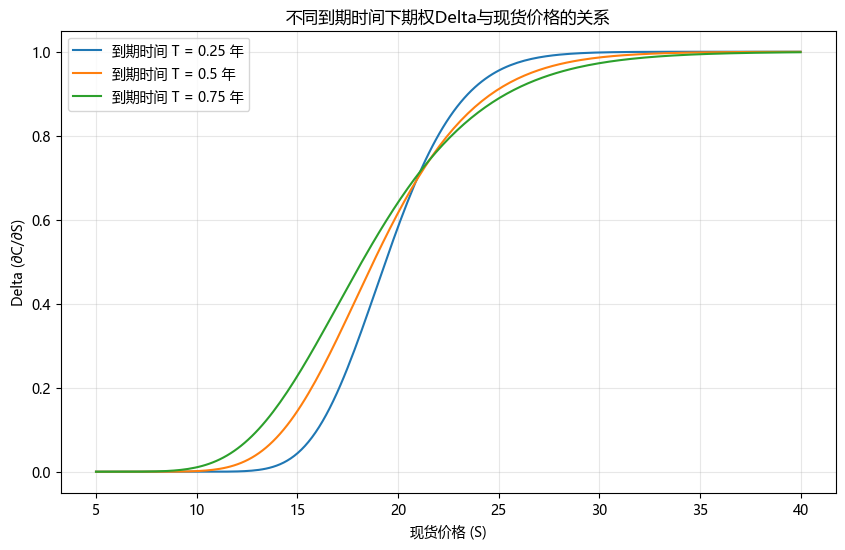

In [10]:
# 绘图2：一阶导数（Delta）与现货价格的关系
plt.figure(figsize=(10, 6))
for T in Ts:
    delta = np.array([delta_call(s, K, T, r, sigma) for s in S])
    plt.plot(S, delta, label=f'到期时间 T = {T} 年')
plt.xlabel('现货价格 (S)')
plt.ylabel('Delta (∂C/∂S)')
plt.title('不同到期时间下期权Delta与现货价格的关系')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('option_delta.png')  # 保存图像
plt.show()

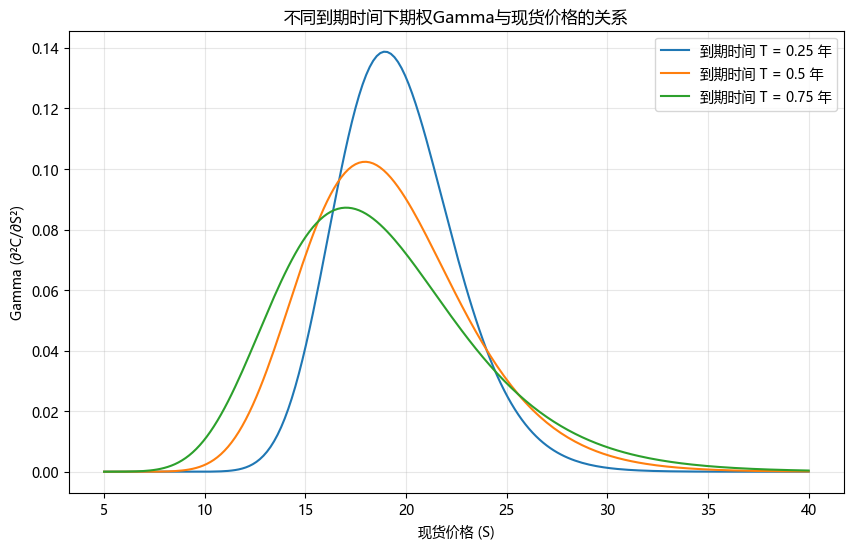

In [11]:

# 绘图3：二阶导数（Gamma）与现货价格的关系
plt.figure(figsize=(10, 6))
for T in Ts:
    gamma = np.array([gamma_call(s, K, T, r, sigma) for s in S])
    plt.plot(S, gamma, label=f'到期时间 T = {T} 年')
plt.xlabel('现货价格 (S)')
plt.ylabel('Gamma (∂²C/∂S²)')
plt.title('不同到期时间下期权Gamma与现货价格的关系')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('option_gamma.png')  # 保存图像
plt.show()